<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/221010_ksat_paper_analysis_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KSAT data process (as of 1005)

# Read data file from Github, Add string length, Number of splitted words (N_Splits)

data: https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/mydata01.csv (17 items)

In [1]:
!pip install textstat

import textstat
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 15.3 MB/s 
     |████████████████████████████████| 2.0 MB 40.1 MB/s 


In [2]:
url = 'https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/mydata01.csv'
df1 = pd.read_csv(url)

In [3]:
# import chardet
# with open('/content/ksatdata_item17.csv', 'rb') as f:
#   enc = chardet.detect(f.read())
# df1 = pd.read_csv('/content/ksatdata_item17.csv', encoding=enc['encoding'])

In [4]:
df1

,Year,Category,QN,Passage
0,2015,Context,Q18,One difference between winners and losers is h...
1,2015,Context,Q19,"As I walked to the train station, I felt the w..."
2,2015,Context,Q20,Many disciplines are better learned by enterin...
3,2015,Context,Q21,The most normal and competent child encounters...
4,2015,Context,Q22,The most normal and competent child encounters...
...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ..."
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...


# Adding a colum with length info

In [5]:
df2 = df1

In [6]:
df2['N_Sents'] = df2['Passage'].apply(textstat.sentence_count)

In [7]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Passage'])):
  TSP = df2['Passage'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen
df2

,Year,Category,QN,Passage,N_Sents,Splits,N_Splits
0,2015,Context,Q18,One difference between winners and losers is h...,8,"[One, difference, between, winners, and, loser...",107
1,2015,Context,Q19,"As I walked to the train station, I felt the w...",10,"[As, I, walked, to, the, train, station,, I, f...",123
2,2015,Context,Q20,Many disciplines are better learned by enterin...,6,"[Many, disciplines, are, better, learned, by, ...",117
3,2015,Context,Q21,The most normal and competent child encounters...,6,"[The, most, normal, and, competent, child, enc...",128
4,2015,Context,Q22,The most normal and competent child encounters...,6,"[The, most, normal, and, competent, child, enc...",128
...,...,...,...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",7,"[According, to, the, market, response, model,,...",163
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,7,"[In, spite, of, the, likeness, between, the, f...",167
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,7,"[Retraining, current, employees, for, new, pos...",155
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,7,"[As, long, as, the, irrealism, of, the, silent...",174


In [8]:
import re

def count_syllables(word):
    return len(
        re.findall('(?!e$)[aeiouy]+', word, re.I) +
        re.findall('^[^aeiouy]*e$', word, re.I)
    )

In [9]:
# Added column: String length
length = []

for i in range(0, len(df2['Passage'])):
  LEN = len(df2['Passage'][i])
  length.append(LEN)
df2['String'] = length
df2

,Year,Category,QN,Passage,N_Sents,Splits,N_Splits,String
0,2015,Context,Q18,One difference between winners and losers is h...,8,"[One, difference, between, winners, and, loser...",107,635
1,2015,Context,Q19,"As I walked to the train station, I felt the w...",10,"[As, I, walked, to, the, train, station,, I, f...",123,628
2,2015,Context,Q20,Many disciplines are better learned by enterin...,6,"[Many, disciplines, are, better, learned, by, ...",117,715
3,2015,Context,Q21,The most normal and competent child encounters...,6,"[The, most, normal, and, competent, child, enc...",128,737
4,2015,Context,Q22,The most normal and competent child encounters...,6,"[The, most, normal, and, competent, child, enc...",128,724
...,...,...,...,...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",7,"[According, to, the, market, response, model,,...",163,1035
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,7,"[In, spite, of, the, likeness, between, the, f...",167,1025
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,7,"[Retraining, current, employees, for, new, pos...",155,981
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,7,"[As, long, as, the, irrealism, of, the, silent...",174,1068


In [10]:
df2['N_Sents'].groupby(df2['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,17.0,7.411765,1.325652,6.0,6.0,8.0,8.0,10.0
2016,17.0,7.411765,1.769845,4.0,7.0,7.0,9.0,10.0
2017,17.0,7.529412,2.124784,5.0,6.0,7.0,8.0,13.0
2018,17.0,7.882353,1.932691,5.0,6.0,8.0,9.0,12.0
2019,17.0,8.000000,2.091650,5.0,7.0,8.0,9.0,13.0
2020,17.0,7.352941,2.059769,5.0,6.0,7.0,9.0,12.0
2021,17.0,8.411765,2.209605,6.0,7.0,8.0,10.0,14.0
2022,17.0,6.941176,1.088037,5.0,6.0,7.0,8.0,9.0


In [11]:
df2.describe()

,Year,N_Sents,N_Splits,String
count,136.000000,136.000000,136.000000,136.000000
mean,2018.500000,7.617647,152.191176,928.669118
std,2.299758,1.866106,20.197732,150.532933
min,2015.000000,4.000000,105.000000,575.000000
25%,2016.750000,6.000000,136.000000,823.250000
50%,2018.500000,7.000000,155.500000,955.500000
75%,2020.250000,9.000000,167.000000,1047.250000
max,2022.000000,14.000000,195.000000,1264.000000


# Lexical Diversity Indices (10 types)

## Getting LD indices

In [12]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 15.5 MB/s 


In [13]:
# Added column: String length
lem = []

for i in range(0, len(df2['Passage'])):
  LEM = ld.flemmatize(df2['Passage'][i])
  print(LEM)
  lem.append(LEM)

df2['Lemma'] = lem

['one', 'difference', 'between', 'winner', 'and', 'loser', 'be', 'how', 'they', 'handle', 'lose', 'even', 'for', 'the', 'best', 'company', 'and', 'most', 'accomplish', 'professional', 'long', 'track', 'record', 'of', 'success', 'be', 'punctuate', 'by', 'slip', 'slide', 'and', 'miniturnarounds', 'even', 'the', 'team', 'that', 'win', 'the', 'game', 'might', 'make', 'mistake', 'and', 'lag', 'behind', 'for', 'part', 'of', 'it', 'that', 'be', 'why', 'the', 'ability', 'to', 'recover', 'quickly', 'be', 'so', 'important', 'trouble', 'be', 'ubiquitous', 'surprise', 'can', 'fall', 'from', 'the', 'sky', 'like', 'volcanic', 'ash', 'and', 'appear', 'to', 'change', 'everything', 'that', 'be', 'why', 'one', 'prominent', 'scholar', 'say', 'anything', 'can', 'look', 'like', 'a', 'failure', 'in', 'the', 'middle', 'thus', 'a', 'key', 'factor', 'in', 'high', 'achievement', 'be', 'bounce', 'back', 'from', 'the', 'low', 'point']
['as', 'i', 'walk', 'to', 'the', 'train', 'station', 'i', 'feel', 'the', 'warm'

In [14]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  msttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  mtld_wrap = ld.mtld_ma_wrap(flt)
  mtld_bid = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(msttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  MTLD_wrap.append(mtld_wrap)
  MTLD_bid.append(mtld_bid)

# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['MTLD_wrap'] = MTLD_wrap
df2['MTLD_bid'] = MTLD_bid

N of sentences

In [15]:
!pip install textstat
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Result file: N of sentences included

In [16]:
df2['N_Sents'] = df2['Passage'].apply(textstat.sentence_count)
df2.to_csv('LD_result_with_Nsents.csv')

## Result file

In [17]:
df2.describe()

,Year,N_Sents,N_Splits,String,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2018.500000,7.617647,152.191176,928.669118,0.606593,7.444320,0.899571,0.046065,0.772010,0.770921,0.802974,70.714724,71.265205,63.743348
std,2.299758,1.866106,20.197732,150.532933,0.057680,0.675416,0.018354,0.008092,0.049462,0.045547,0.039108,20.633628,20.801995,19.685693
min,2015.000000,4.000000,105.000000,575.000000,0.451282,5.376082,0.843935,0.031885,0.630000,0.581905,0.686500,33.165609,32.157895,0.000000
25%,2016.750000,6.000000,136.000000,823.250000,0.572516,7.022525,0.888772,0.039840,0.740000,0.749653,0.780868,55.157307,57.424318,51.836679
50%,2018.500000,7.000000,155.500000,955.500000,0.603484,7.441873,0.899538,0.046061,0.776667,0.775913,0.806953,68.431332,68.806323,62.218431
75%,2020.250000,9.000000,167.000000,1047.250000,0.648782,7.954951,0.913980,0.050385,0.806667,0.802464,0.833115,83.649431,83.517426,75.401795
max,2022.000000,14.000000,195.000000,1264.000000,0.728972,9.071147,0.932349,0.073482,0.890000,0.866111,0.880651,138.947368,132.218750,125.784722


In [18]:
df2['MATTR'].groupby(df2['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,17.0,0.766036,0.042779,0.667755,0.755963,0.772696,0.795405,0.813165
2016,17.0,0.773909,0.064759,0.581905,0.755575,0.783291,0.808689,0.866111
2017,17.0,0.783982,0.030315,0.728142,0.768939,0.789333,0.802222,0.843504
2018,17.0,0.766674,0.043237,0.659032,0.753333,0.776147,0.799063,0.821569
2019,17.0,0.760403,0.046946,0.675960,0.719439,0.766786,0.805781,0.832034
2020,17.0,0.775653,0.051979,0.675960,0.749219,0.770909,0.818763,0.855200
2021,17.0,0.775449,0.036112,0.708547,0.750076,0.776852,0.782500,0.851600
2022,17.0,0.765262,0.045270,0.687068,0.749687,0.774182,0.794667,0.837838


In [19]:
df2['MATTR'].describe()

count    136.000000
mean       0.770921
std        0.045547
min        0.581905
25%        0.749653
50%        0.775913
75%        0.802464
max        0.866111
Name: MATTR, dtype: float64

In [20]:
df2['HDD'].groupby(df2['Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,17.0,0.801174,0.040385,0.723288,0.776571,0.809109,0.826796,0.856121
2016,17.0,0.812646,0.041819,0.686500,0.794061,0.820248,0.838549,0.860809
2017,17.0,0.808501,0.027099,0.757223,0.794441,0.804080,0.825001,0.853785
2018,17.0,0.799011,0.036200,0.719713,0.775315,0.807006,0.832689,0.843540
2019,17.0,0.795133,0.044554,0.709029,0.764589,0.798066,0.828387,0.871256
2020,17.0,0.807469,0.048992,0.709029,0.784797,0.810360,0.842698,0.880651
2021,17.0,0.804015,0.033135,0.752977,0.781755,0.797810,0.834443,0.855967
2022,17.0,0.795840,0.041261,0.708912,0.782583,0.804126,0.818390,0.872252


In [21]:
df2['HDD'].describe()

count    136.000000
mean       0.802974
std        0.039108
min        0.686500
25%        0.780868
50%        0.806953
75%        0.833115
max        0.880651
Name: HDD, dtype: float64

# Plotting

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

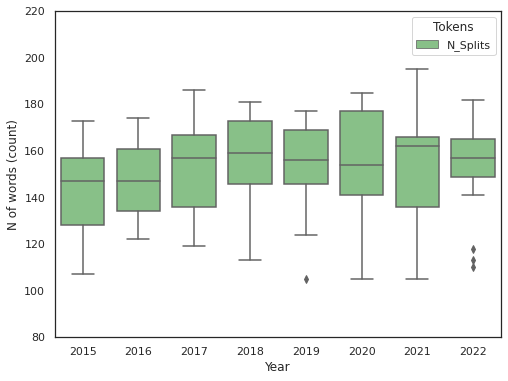

In [23]:
sns.set(rc={'figure.figsize':(8,6),"font.size":40,"axes.titlesize":140,"axes.labelsize":60},style="white") # font size doesn't work
# ax = sns.boxplot (y=df2)
# ax.set_ylim([0, 210])

sns.set_theme(style='white')
dd=pd.melt(df2,id_vars=['Year'],value_vars=['N_Splits'],var_name='Tokens')
ax = sns.boxplot(x='Year',y='value',data=dd,hue='Tokens',palette="Accent")
ax.set_ylim([80,220])
ax.set(xlabel='Year', ylabel='N of words (count)')
plt.savefig('boxplot_Nsplit.png')  

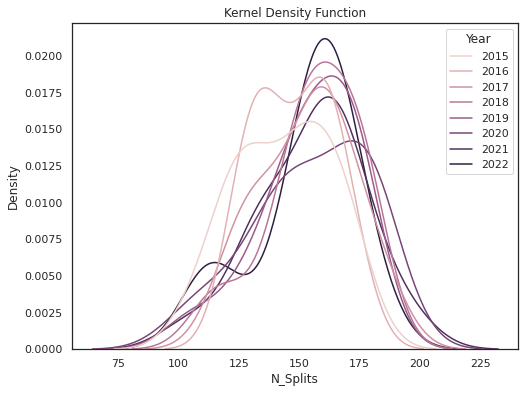

In [24]:
sns.kdeplot(x='N_Splits', data=df2, hue='Year', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_Nsplit.png')  

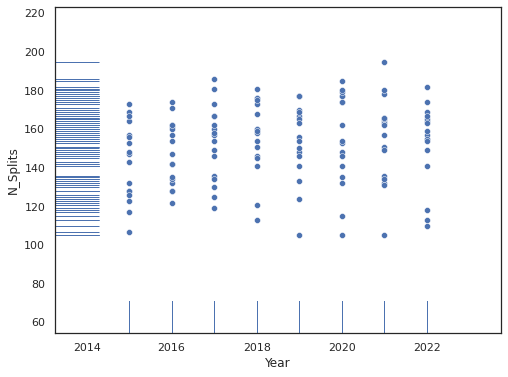

In [25]:
sns.scatterplot(data=df2, x="Year", y="N_Splits")
sns.rugplot(data=df2, x="Year", y="N_Splits", height=.1) 
plt.savefig('Rug_Nsplit.png')  

문항별 어휘수 및 문장수

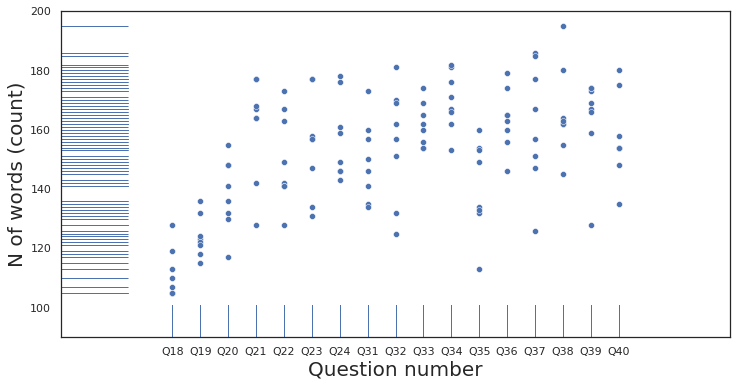

In [26]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df2, x="QN", y="N_Splits")
ax = sns.rugplot(data=df2, x="QN", y="N_Splits", height=.1) 
ax.set_ylim([90,200])
ax.set(xlabel='Question number', ylabel='N of words (count)')
plt.savefig('Rug_Nsplit_byQ.png')  

# Lexical Diversity analysis: select TTR, MassTTR, MTLD, HDD

In [27]:
df3 = df2
for col in df3.columns:
    print(col)

Year
Category
QN
Passage
N_Sents
Splits
N_Splits
String
Lemma
TTR
RTTR
LogTTR
MassTTR
MSTTR
MATTR
HDD
MTLD
MTLD_wrap
MTLD_bid


In [28]:
df3 = df2[['Year','QN','N_Splits','N_Sents','TTR','MATTR','HDD','MTLD']]
df3.head()

,Year,QN,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD
0,2015,Q18,107,8,0.728972,0.794828,0.841506,110.542069
1,2015,Q19,123,10,0.666667,0.795405,0.824749,62.363391
2,2015,Q20,117,6,0.623932,0.758529,0.776571,53.164604
3,2015,Q21,128,6,0.703125,0.813165,0.848132,112.313725
4,2015,Q22,128,6,0.703125,0.813165,0.848132,112.313725


In [29]:
df3.groupby('Year')['MTLD'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,17.0,70.132748,23.188553,43.310215,53.164604,64.850195,83.004745,112.313725
2016,17.0,76.792884,23.264766,33.165609,61.406326,79.756780,90.865342,128.591868
2017,17.0,68.440139,16.220003,51.828086,54.530003,64.375632,76.120146,100.387122
2018,17.0,65.848274,18.339833,35.609356,57.055556,61.101336,77.132075,104.167293
2019,17.0,67.667011,22.549707,34.687500,53.672626,61.205022,83.649431,112.822093
2020,17.0,72.622156,22.232964,34.687500,55.366409,74.704918,84.541450,110.638889
2021,17.0,70.253735,15.130896,47.805145,57.070312,74.518367,82.715676,90.675093
2022,17.0,73.960848,24.221346,35.844810,63.181845,74.648523,87.299160,138.947368


In [30]:
df3['MTLD'].describe()

count    136.000000
mean      70.714724
std       20.633628
min       33.165609
25%       55.157307
50%       68.431332
75%       83.649431
max      138.947368
Name: MTLD, dtype: float64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

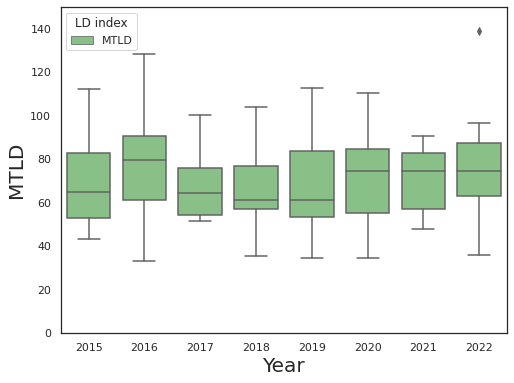

In [32]:
sns.set(rc={'figure.figsize':(8,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
# sns.set_theme(style='white')
dd=pd.melt(df3,id_vars=['Year'],value_vars=['MTLD'],var_name='LD index')
ax = sns.boxplot(x='Year',y='value',data=dd,hue='LD index',palette="Accent")
ax.set_ylim([0,150])
ax.set(xlabel='Year', ylabel='MTLD')
plt.savefig('boxplot_MTLD_by_year.png')  

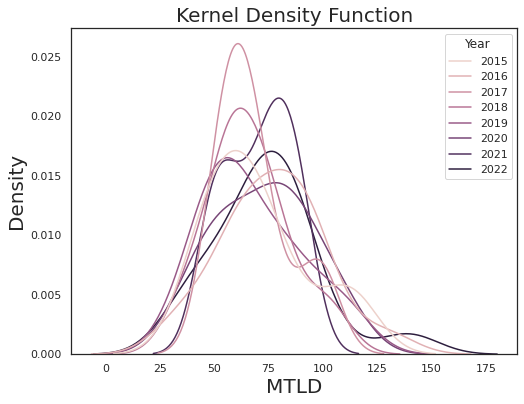

In [33]:
sns.kdeplot(x='MTLD', data=df3, hue='Year', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_MTLD.png')  

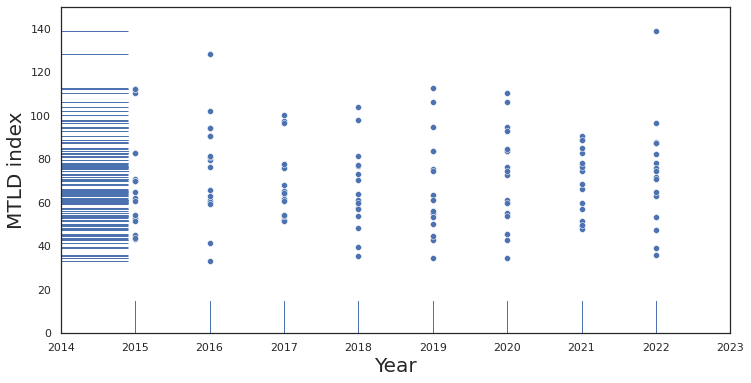

In [34]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df3, x="Year", y="MTLD")
ax = sns.rugplot(data=df3, x="Year", y="MTLD", height=.1) 
ax.set_ylim([0,150])
ax.set_xlim([2014,2023])
ax.set(xlabel='Year', ylabel='MTLD index')
plt.savefig('Rug_MTLD_byYear.png') 

MATTR

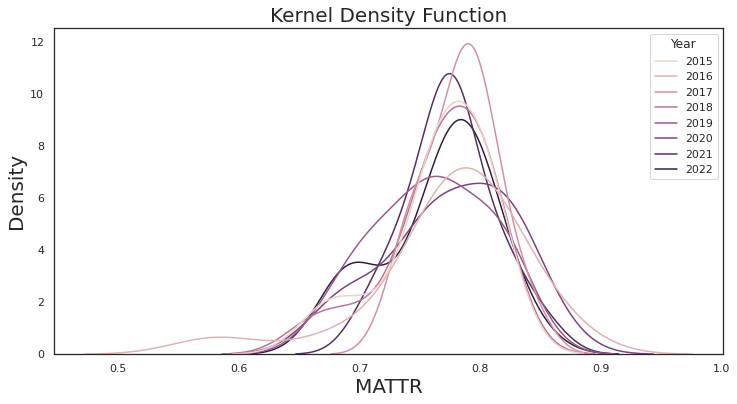

In [35]:
sns.kdeplot(x='MATTR', data=df3, hue='Year', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_MATTR.png')  

In [36]:
df3.groupby('Year')['MATTR'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,17.0,0.766036,0.042779,0.667755,0.755963,0.772696,0.795405,0.813165
2016,17.0,0.773909,0.064759,0.581905,0.755575,0.783291,0.808689,0.866111
2017,17.0,0.783982,0.030315,0.728142,0.768939,0.789333,0.802222,0.843504
2018,17.0,0.766674,0.043237,0.659032,0.753333,0.776147,0.799063,0.821569
2019,17.0,0.760403,0.046946,0.675960,0.719439,0.766786,0.805781,0.832034
2020,17.0,0.775653,0.051979,0.675960,0.749219,0.770909,0.818763,0.855200
2021,17.0,0.775449,0.036112,0.708547,0.750076,0.776852,0.782500,0.851600
2022,17.0,0.765262,0.045270,0.687068,0.749687,0.774182,0.794667,0.837838


# [2] Readability

## install packages

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

!pip install textstat
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Readability indices & Plotting for papers

In [38]:
from typing import TextIO
FRE = []
FKG = []
GF = []
ARI = []
CLI = []
LWF = []
DCRS = []
TS = []

for i in range(0, len(df2['Passage'])):
  text = df2['Passage'][i]
  fre = textstat.flesch_reading_ease(text)
  fkg = textstat.flesch_kincaid_grade(text)
  gf = textstat.gunning_fog(text)
  ari = textstat.automated_readability_index(text)
  cli = textstat.coleman_liau_index(text)
  lwf = textstat.linsear_write_formula(text)
  dcrs = textstat.dale_chall_readability_score(text)
  ts = textstat.text_standard(text)

  FRE.append(fre)
  FKG.append(fkg)
  GF.append(gf)
  ARI.append(ari)
  CLI.append(cli)
  LWF.append(lwf)
  DCRS.append(dcrs)
  TS.append(ts)


df3['FRE'] = FRE
df3['FKG'] = FKG
df3['GF'] = GF
df3['ARI'] = ARI
df3['CLI'] = CLI
df3['LWF'] = LWF
df3['DCRS'] = DCRS
df3['TS'] = TS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

df3: LD(4 indices)  + Readability

In [39]:
df3.to_csv('results_all_1005.csv')

In [40]:
df3.head()

,Year,QN,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD,FRE,FKG,GF,ARI,CLI,LWF,DCRS,TS
0,2015,Q18,107,8,0.728972,0.794828,0.841506,110.542069,74.79,6.2,8.72,8.5,10.03,6.750000,8.73,8th and 9th grade
1,2015,Q19,123,10,0.666667,0.795405,0.824749,62.363391,84.37,4.5,6.87,4.1,4.80,7.428571,6.94,4th and 5th grade
2,2015,Q20,117,6,0.623932,0.758529,0.776571,53.164604,51.68,10.9,13.95,12.4,11.95,10.833333,9.60,10th and 11th grade
3,2015,Q21,128,6,0.703125,0.813165,0.848132,112.313725,66.78,9.2,12.90,11.2,9.11,12.200000,8.89,8th and 9th grade
4,2015,Q22,128,6,0.703125,0.813165,0.848132,112.313725,66.78,9.2,12.90,11.2,9.11,12.200000,8.89,8th and 9th grade


In [41]:
47/136

0.34558823529411764

In [42]:
a = df3[df3['FRE'] < 50]
a.shape

(65, 16)

In [43]:
df4 = df3
df4 = df4[['Year','QN','N_Splits','N_Sents','TTR','MTLD','FRE','FKG','GF','DCRS']]

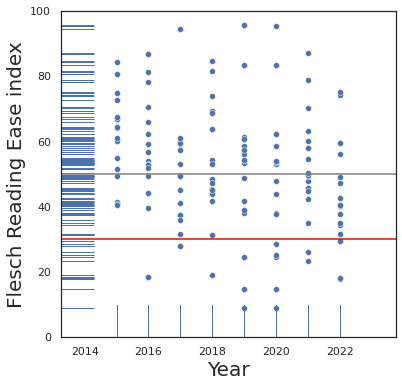

In [44]:
sns.set(rc={'figure.figsize':(6,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="FRE")
ax = sns.rugplot(data=df4, x="Year", y="FRE", height=.1) 
ax.set_ylim([0,100])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Year', ylabel='Flesch Reading Ease index')
ax.axhline(50, color="gray")
ax.axhline(30, color="red")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FRE_byYear.png') 

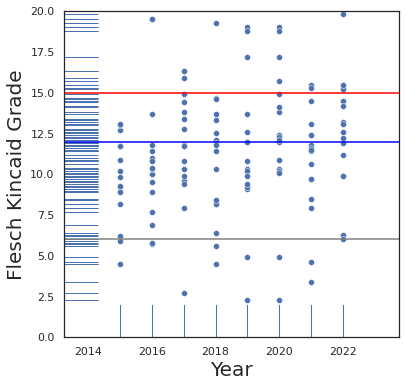

In [45]:
sns.set(rc={'figure.figsize':(6,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="FKG")
ax = sns.rugplot(data=df4, x="Year", y="FKG", height=.1) 
ax.set_ylim([0,20])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Year', ylabel='Flesch Kincaid Grade')
ax.axhline(15, color="red")
ax.axhline(12, color="blue")
ax.axhline(6, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FKG_byYear.png') 

In [46]:
a = df4.groupby('Year')['FKG'].describe()
a.to_csv('FKG_summary_by_Year.csv')

In [47]:
b = df4.groupby('Year')['FRE'].describe()
b.to_csv('FRE_summary_by_Year.csv')

In [48]:
b1 = df4.describe()
b1.to_csv('Readability_summary_total.csv')


# Getting individual numbers for the paper 

In [80]:
b2 = df4[15 <= df3['GF']]
b2.shape

(38, 10)

In [81]:
38/136

0.27941176470588236

In [49]:
a1 = df4[10 <= df3['DCRS']]
a1.shape

(31, 10)

In [50]:
31/136

0.22794117647058823

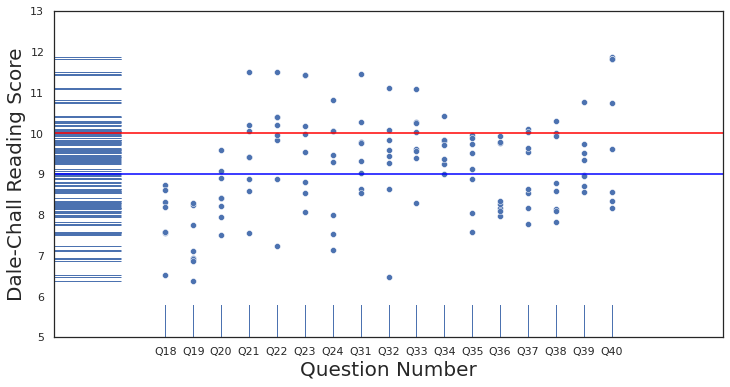

In [51]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="QN", y="DCRS")
ax = sns.rugplot(data=df4, x="QN", y="DCRS", height=.1) 
ax.set_ylim([5,13])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Question Number', ylabel='Dale-Chall Reading Score')
ax.axhline(10, color="red")
ax.axhline(9, color="blue")
# ax.axhline(6, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_DCRS_byQN.png') 

In [52]:
a2 = df4[10 <= df3['DCRS']]
a2.shape

(31, 10)

In [53]:
74/136

0.5441176470588235

# Pie chart of readability indices

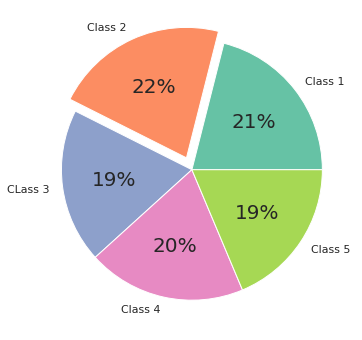

In [54]:
import matplotlib.pyplot as plt
import seaborn

sns.set(rc={'figure.figsize':(6,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white") # font size doesn't work  
# declaring data
data = [44, 45, 40, 41, 39]
keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']
  
# declaring exploding pie
explode = [0, 0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette("Set2")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

## Data cut (categorize)

In [55]:
import pandas as pd

In [56]:
df4.head()

,Year,QN,N_Splits,N_Sents,TTR,MTLD,FRE,FKG,GF,DCRS
0,2015,Q18,107,8,0.728972,110.542069,74.79,6.2,8.72,8.73
1,2015,Q19,123,10,0.666667,62.363391,84.37,4.5,6.87,6.94
2,2015,Q20,117,6,0.623932,53.164604,51.68,10.9,13.95,9.60
3,2015,Q21,128,6,0.703125,112.313725,66.78,9.2,12.90,8.89
4,2015,Q22,128,6,0.703125,112.313725,66.78,9.2,12.90,8.89


In [57]:
## pd.cut: how to use

b1 = pd.cut(df4['FRE'], bins=[0, 30, 50, 60,1000], include_lowest=True, labels=['Very difficult', 'Difficult', 'Appropriate',"East"])

count = b1.value_counts()
print(count)

Difficult         47
East              40
Appropriate       31
Very difficult    18
Name: FRE, dtype: int64


In [58]:
## pd.cut: how to use

b1 = pd.cut(df4['GF'], bins=[0, 9, 13, 16,20], include_lowest=True, labels=["Easy", 'Appropriate', 'Difficult', 'Very difficult'])

count = b1.value_counts()
print(count)

Appropriate       47
Difficult         45
Very difficult    21
Easy              17
Name: GF, dtype: int64


In [59]:
## pd.cut: how to use

b1 = pd.cut(df4['DCRS'], bins=[0, 7, 8, 9, 10], include_lowest=True, labels=["Easy", 'Appropriate', 'Difficult', 'Very difficult'])

count = b1.value_counts()
print(count)

Very difficult    44
Difficult         41
Appropriate       15
Easy               6
Name: DCRS, dtype: int64


In [60]:
b1

0           Difficult
1                Easy
2      Very difficult
3           Difficult
4           Difficult
            ...      
131    Very difficult
132    Very difficult
133    Very difficult
134         Difficult
135    Very difficult
Name: DCRS, Length: 136, dtype: category
Categories (4, object): ['Easy' < 'Appropriate' < 'Difficult' < 'Very difficult']

===========================

[1] FRE pie chart

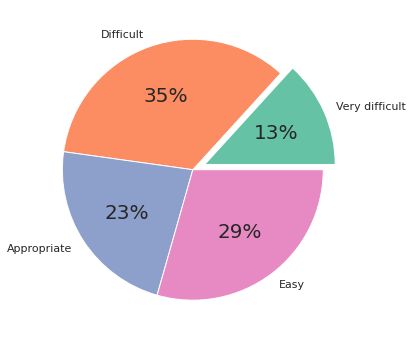

In [61]:
import matplotlib.pyplot as plt
import seaborn

sns.set(rc={'figure.figsize':(6,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white") # font size doesn't work  

# declaring data
data = [18, 47, 31, 40]
keys = ['Very difficult', 'Difficult','Appropriate','Easy']
# declaring exploding pie
explode = [0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette("Set2")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

# displaying chart
ax.set_title("Flesch Reading Ease")

plt.savefig('Pie_FRE.png') 
plt.show()

[2] Gunning-Fog pie

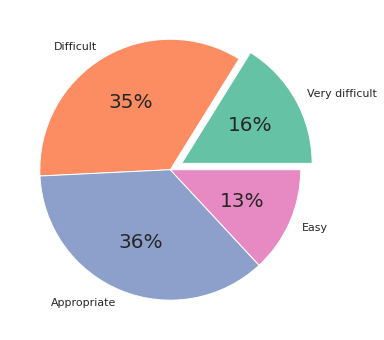

In [62]:
import matplotlib.pyplot as plt
import seaborn

sns.set(rc={'figure.figsize':(6,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white") # font size doesn't work  

# declaring data
data = [21, 45, 47, 17]
keys = ['Very difficult', 'Difficult','Appropriate','Easy']
# declaring exploding pie
explode = [0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette("Set2")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

# displaying chart
ax.set_title("Gunning-Fog")

plt.savefig('Pie_GF.png') 
plt.show()

[3] Dale-Chall pie

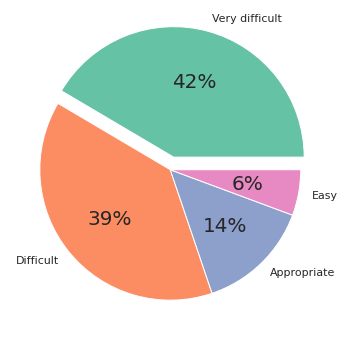

In [63]:
import matplotlib.pyplot as plt
import seaborn

sns.set(rc={'figure.figsize':(6,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white") # font size doesn't work  

# declaring data
data = [44, 41, 15, 6]
keys = ['Very difficult', 'Difficult','Appropriate','Easy']
# declaring exploding pie
explode = [0.1, 0, 0, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette("Set2")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%')

# displaying chart
ax.set_title("Dale-Chall")

plt.savefig('Pie_DC.png') 
plt.show()

# Statistic analysis for the data

In [71]:
df5 = df3[['Year','QN','N_Splits','N_Sents','TTR','MATTR','MTLD','HDD','FRE','FKG','GF','DCRS']]
df5.head()

,Year,QN,N_Splits,N_Sents,TTR,MATTR,MTLD,HDD,FRE,FKG,GF,DCRS
0,2015,Q18,107,8,0.728972,0.794828,110.542069,0.841506,74.79,6.2,8.72,8.73
1,2015,Q19,123,10,0.666667,0.795405,62.363391,0.824749,84.37,4.5,6.87,6.94
2,2015,Q20,117,6,0.623932,0.758529,53.164604,0.776571,51.68,10.9,13.95,9.60
3,2015,Q21,128,6,0.703125,0.813165,112.313725,0.848132,66.78,9.2,12.90,8.89
4,2015,Q22,128,6,0.703125,0.813165,112.313725,0.848132,66.78,9.2,12.90,8.89


In [72]:
ld = df5[['TTR','MATTR','MTLD','HDD']]

In [76]:
corrMatrix = ld.corr()
corrMatrix

,TTR,MATTR,MTLD,HDD
TTR,1.000000,0.745764,0.769432,0.837011
MATTR,0.745764,1.000000,0.818469,0.896942
MTLD,0.769432,0.818469,1.000000,0.857670
HDD,0.837011,0.896942,0.857670,1.000000


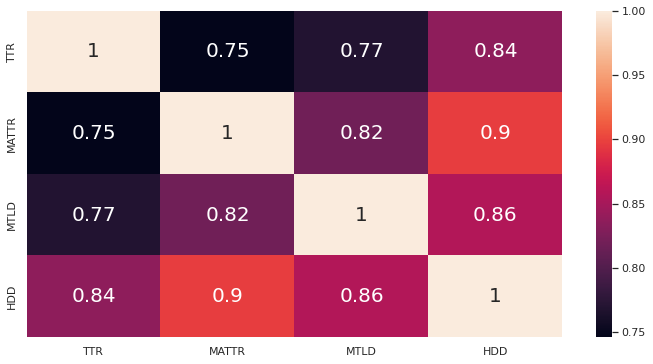

In [79]:
import seaborn as sn
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white")

sn.heatmap(corrMatrix, annot=True)
plt.show()

# Others

The Gunning Fog index: It generates a grade level between 0 and 20. It estimates the education level required to understand the text.
Too many different words per thoughsand, not enough simple sentences, too difficult for the inteded audience.

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="GF")
ax = sns.rugplot(data=df4, x="Year", y="GF", height=.1) 
ax.set_ylim([0,20])
# ax.set_xlim([0,150])
ax.set(xlabel='Year', ylabel='Dale-Chall Reading Score')
ax.axhline(15, color="red")
ax.axhline(12, color="blue")
ax.axhline(9, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('GF_scatter.png') 

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Year", y="DCRS")
ax = sns.rugplot(data=df4, x="Year", y="DCRS", height=.1) 
ax.set_ylim([5,13])
# ax.set_xlim([0,150])
ax.set(xlabel='Year', ylabel='Dale-Chall Reading Score')
# ax.axhline(15, color="red")
ax.axhline(10, color="red")
ax.axhline(9, color="blue")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('DCRS_scatter.png')

========================================================

In [ ]:
df4['DCRS'].describe()

In [ ]:
plt.hist(df4['DCRS'], binwidth=1)

In [ ]:
ordered_ttr = list(df2['TTR']).sort()
ordered_ttr

In [ ]:
a1 = df2[['N_Splits','TTR','MSTTR']]
a2 = a1.sort_values(by=['N_Splits'])
a2

In [ ]:
df3 = df2.sort_values(by=['N_Splits'])

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.scatter(df2['N_Splits'],df2['TTR'],  label='TTR')
# plt.scatter(df2['N_Splits'],df2['LogTTR'],  label='LogTTR')
# plt.scatter(df2['N_Splits'],df2['MSTTR'],  label='MSTTR')
plt.legend()

### Linear regression of TTR and Length

In [ ]:
# importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# # f = plt.figure(figsize=(10, 10))
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# data
df = df2
 
# scatter plot with regression
# line(by default)
sns.lmplot(x ='N_Splits', y ='TTR', data = df)
 
# Show the plot
plt.show()

In [ ]:
# Residual plots
sns.residplot(x ='N_Splits', y ='TTR', data = df)

In [ ]:
sns.lmplot(x ='N_Splits', y ='MTLD', data = df)
 
# Show the plot
plt.show()

In [ ]:
# Residual plots
sns.residplot(x ='N_Splits', y ='MTLD', data = df)

In [ ]:
import statsmodels.api as sm

X = df["N_Splits"]
y = df["TTR"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
X = df["N_Splits"]
y = df["MTLD"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

## Style: additionaal Boxplots

In [ ]:
import seaborn as sns
import numpy as np

### Setting the figure size

In [ ]:
sns.set(rc={'figure.figsize':(12,8)}) #set width and height

In [ ]:
df = df2
df = df[['Year','TTR','MSTTR','HDD','MTLD']]

dd=pd.melt(df,id_vars=['Year'],value_vars=['TTR','HDD','MSTTR'],var_name='fruits')
sns.boxplot(x='Year',y='value',data=dd,hue='fruits')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Your data, e.g. results per algorithm:
data1 = [5,5,4,3,3,5]
data2 = [6,6,4,6,8,5]
data3 = [7,8,4,5,8,2]
data4 = [6,9,3,6,8,4]

# --- Combining your data:
data_group1 = [data1, data2]
data_group2 = [data3, data4]

# --- Labels for your data:
labels_list = ['a','b']
xlocations  = range(len(data_group1))
width       = 0.3
symbol      = 'r+'
ymin        = 0
ymax        = 10

ax = plt.gca()
ax.set_ylim(ymin,ymax)
ax.set_xticklabels( labels_list, rotation=0 )
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks(xlocations)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('title')

# --- Offset the positions per group:
positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

plt.boxplot(data_group1, 
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group1, 
            widths=width, 
#           notch=False,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.boxplot(data_group2, 
            labels=labels_list,
            sym=symbol,
            positions=positions_group2, 
            widths=width, 
#           notch=False,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.savefig('boxplot_grouped.png')  
plt.savefig('boxplot_grouped.pdf')    # when publishing, use high quality PDFs
#plt.show()                   # uncomment to show the plot. 

In [ ]:
dd = pd.melt(df3, id_vars = 'Year'],value_vars = ['TTR','HDD'],var_name='LD')
sns.boxplot(x = 'Year', y = 'LD index', data=dd, hue='LD')

### MTLD grouped plots

In [ ]:
datatop = df2.tail()
datatop

column names

In [ ]:
for col in df2.columns:
    print(col)

In [ ]:
groups = df2.groupby("Category")
for name, group in groups:
    plt.plot(group["N_Splits"], group["MTLD"], marker="o", linestyle="", label=name)
plt.legend()

In [ ]:
f = plt.figure(figsize=(10, 10))
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

data = df2
data = data.pivot("Year", "QN", "MTLD")
ax = sns.heatmap(data)

In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
df3

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
df

In [ ]:
# df4 = df3.iloc[:, [6,8,9,10,11,12,13,14,15,16,17]]

In [ ]:
# import seaborn as sns; sns.set_theme()